# Declaration of Originality

![image.png](attachment:image.png)

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Lim Cheng Xun (2401755J)
* Tutorial Group                : PC03
* Tutor						    : Mr Ruchir Srivastava
* Submission Date               : 11th February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [387]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Business Understanding
Goal: The goal of my model it to predict whether annual income of an individual will exceeds $50K/yr based on census data collected.

# 2. Data Understanding

## 2.1 Load dataset

In [388]:
# Load dataset into a pandas DataFrame and replace ' ?' with NaN to ensure proper handling of missing values otherwise they may be misinterpreted as valid entries.
# Since the ' ?' entries are under the datatype object (string) they are considered proper entries as far as pandas is concerned.
# Thus, we specify na_values=' ?' in the read_csv function to convert these entries to NaN.
df_1 = pd.read_csv('adult.csv', na_values=' ?')
df = df_1.copy()

df['income'] = df['income'].str.replace('.', '', regex=False)

df['income'] = df['income'].str.strip()
df['income'] = df['income'].map({
    '<=50K': 0, 
    '>50K': 1
})

df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## 2.2 Summary Statistics

In [389]:
# Understand the type of variable for each column
# This will help in deciding which columns need to be encoded or transformed later on
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [390]:
# Check for missing data
# Here we check the number of missing values in each column
# The missing values are represented as NaN in the DataFrame
df.replace(' ?', np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [391]:
# Describe data distribution
df.describe()

# From the descriptive statistics,

# We can observe that the average age of individuals in the dataset is approximately 38 years, with a minimum age of 17 and a maximum age of 90.

# The average hours worked per week is around 40 hours, with some individuals working as few as 1 hour and others working up to 99 hours per week. (potential outliers)

# The capital gain and capital loss columns at the minimum, 25th percentile, 50th percentile (median), and 75th percentile all have a value of 0, 
# which indicates that a significant portion of individuals in the dataset do not have any capital gains or losses.

# The education-num column, which represents the number of years of education completed, has an average value of approximately 10 years,
# with a minimum of 1 year and a maximum of 16 years. This suggests that the dataset includes individuals with varying levels of education, 
# from those who have completed only a few years of schooling to those who have completed higher education.

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


### Target Variable (y)
y = df[income]

### Features Used (X)
X = df[age, workclass, fnlwgt, education, enducation-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country]

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

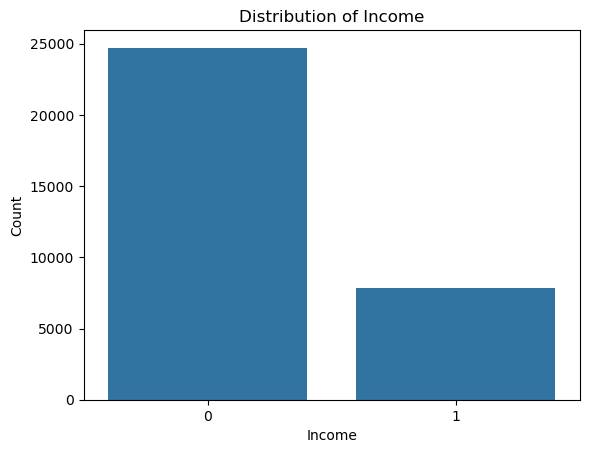

In [392]:
# Understanding distribution of target
# Here we check the distribution of the target variable 'income'
# This will help us understand if the dataset is balanced or imbalanced
# We will use a count plot to visualize the distribution

sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# From the count plot, we can observe that the dataset is imbalanced, with a significantly higher number of individuals earning <=50K (0) compared to those earning >50K (1).
# This imbalance may have implications for model training and evaluation, as models may be biased towards the majority class.
# It is important to consider this imbalance when developing and evaluating machine learning models on this dataset.

# Statiscally there are 24720 individuals earning <=50K (0) and 7841 individuals earning >50K (1) in the dataset. 
# Which means approximately 75.9% of individuals earn <=50K (0) while only 24.1% earn >50K (1).

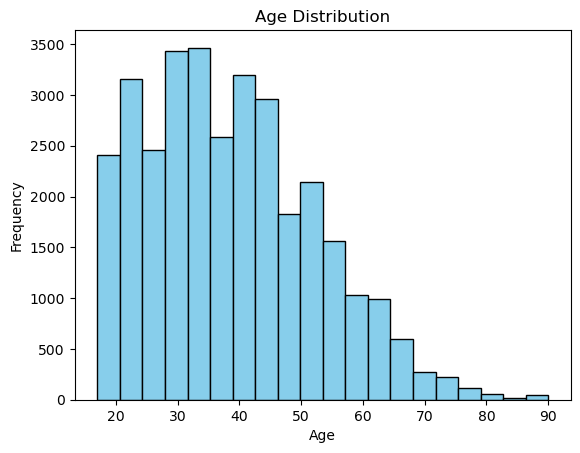

In [393]:
# Understanding distribution of features
## Age distribution (Histogram)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# From the age distribution histogram, we can observe that the age of individuals in the dataset is approximately normally distributed,
# with a peak around the age of 30-40 years.
# There are fewer individuals at the younger and older ends of the age spectrum,
# with a gradual decrease in frequency as age increases or decreases from the peak.
# This suggests that the dataset includes a diverse range of ages,
# with a concentration of individuals in their prime working years.

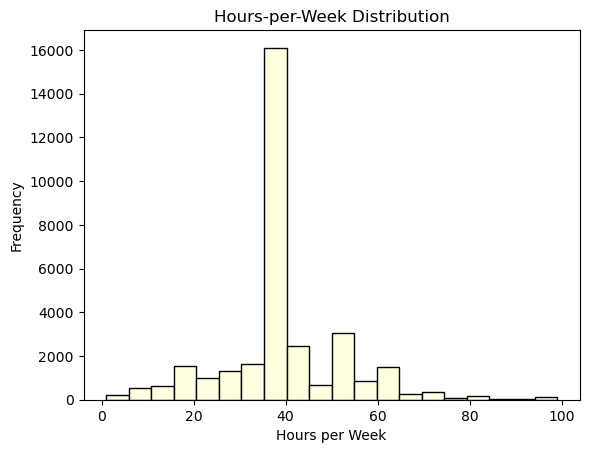

In [394]:
## Hours-per-week distribution (Histogram)
plt.hist(df['hours-per-week'], bins=20, color='lightyellow', edgecolor='black')
plt.title('Hours-per-Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

# From the hours-per-week distribution histogram, we can observe that the number of hours worked per week by individuals in the dataset is right-skewed.
# The majority of individuals work between 30 to 50 hours per week, with a peak around 40 hours.
# There are fewer individuals who work very low hours (1-20 hours) and very high hours (60-99 hours).
# This suggests that the dataset includes a diverse range of work hours, with a concentration of individuals who work full-time (around 40 hours per week).
# This can also suggest potential outliers in the dataset, as some individuals report working up to 99 hours per week, which is significantly higher than the average work hours.

### 2.3.2 Understanding relationship between variables

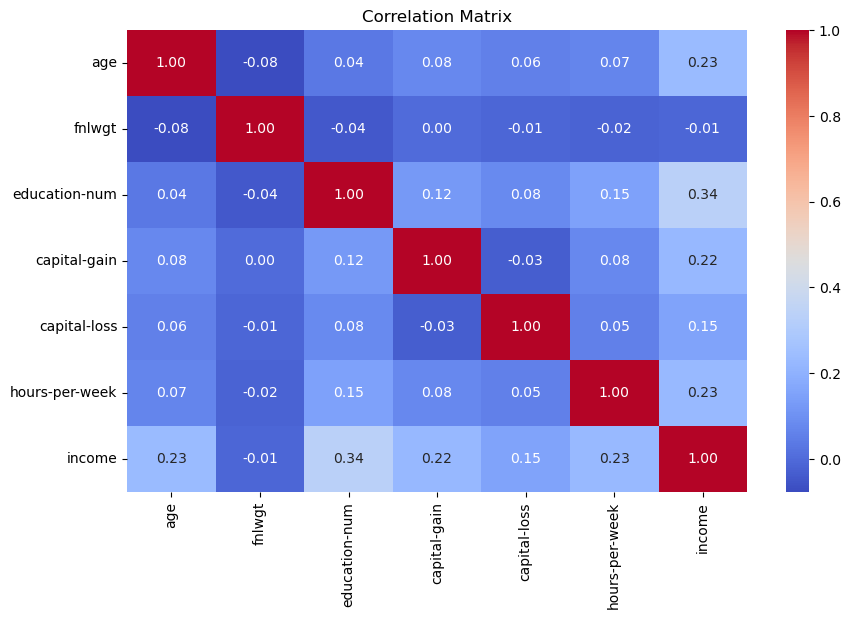

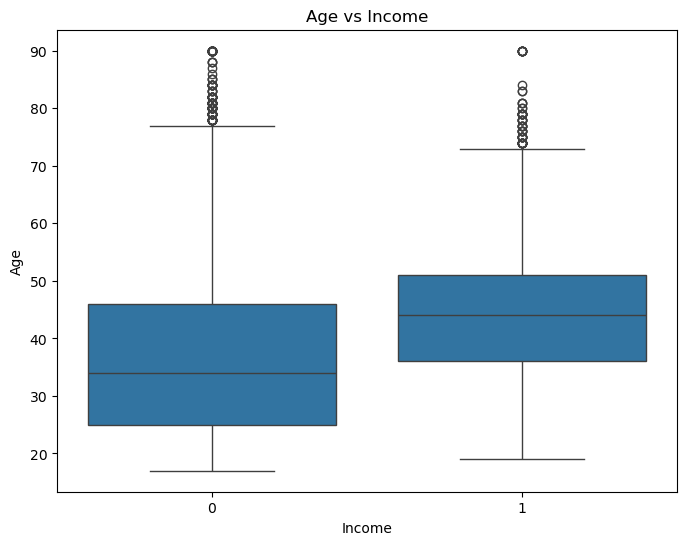

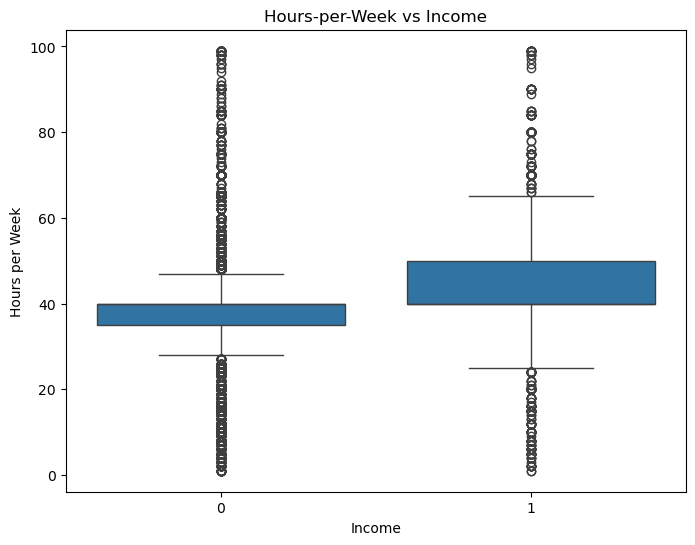

In [395]:
# Understanding relationship between variables

## Correlation matrix for numerical features
# Here we check the correlation between numerical features in the dataset
# We will use a heatmap to visualize the correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# From the correlation matrix heatmap,
# we can observe that most of the variablees in the dataset are independant of each other as their correlation values are close to 0.
# This can be beneficial for machine learning models, as it reduces the risk of multicollinearity and helps in better generalization.
# We can also observe that in the fnlwgt column, it has negative or 0 correlation with all other numerical features.
# This suggests that fnlwgt may not be a useful feature for predicting income levels and may be considered for removal during feature selection.

## Here we will compare some of my numerical features against the target variable 'income' using box plots to visualize their distributions based on income levels.
# Age vs Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age vs Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

# From the box plot comparing age and income,
# we can observe that individuals earning >50K tend to be older on average compared to those earning <=50K.
# The median age for individuals earning >50K is higher, and the interquartile range (IQR) is also shifted towards older ages.
# This suggests that age may be a factor influencing income levels, with older individuals potentially having more work experience and higher earning potential.

# Hours-per-week vs Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='income', y='hours-per-week', data=df)
plt.title('Hours-per-Week vs Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

# From the box plot comparing hours-per-week and income,
# we can observe that individuals earning >50K tend to work more hours per week on average compared to those earning <=50K.
# The median hours worked per week for individuals earning >50K is higher, and the interquartile range (IQR) is also shifted towards longer work hours.
# This suggests that the number of hours worked per week may be a factor influencing income levels,
# with individuals who work more hours potentially having higher earning potential.

#### What to do after Data Visualisation

- Need to balance the dataset as there is around 75% earning less than 50k while only around 25% are earning more than 50k
- There may be outliers in the hours per week columns that may need to be removed for better clarity
- Remove the fnlwgt as it has 0 or negative correlation with all other variables which may mean it is not a useful feature for predicting income

# 3. Data Preparation

## 3.1 Data Cleaning

In [396]:
## Clean data
# Data Cleaning (Deleting rows with missing values)
df.dropna(inplace=True)
df.isnull().sum()
df

# After cleaning the data by removing rows with missing values, we rechecked the number of missing values in each column to ensure that there are no more missing values left in the dataset.
# The total number of rows after cleaning the data is: 30162 rows from an original 32561 rows.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [397]:
# Data Cleaning (Removing Outliers)
Q1 = df['hours-per-week'].quantile(0.25)
Q3 = df['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['hours-per-week'] >= lower_bound) & (df['hours-per-week'] <= upper_bound)]
df

# After removing outliers from the 'hours-per-week' column using the IQR method, we have reduced the impact of extreme values on our dataset.
# The total number of rows after removing outliers is: 29061 rows from an original 30162 rows after cleaning missing values.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [398]:
# Removing the 'fnlwgt' column as it has little to no correlation with other numerical features
# From the visualisation above we can see that the 'fnlwgt' column has very low correlation with other numerical features.
# Thus, we will remove this column from the dataset.
df.drop(columns=['fnlwgt'], inplace=True)
df

C:\Users\limch\AppData\Local\Temp\ipykernel_25308\4148792394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['fnlwgt'], inplace=True)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


## 3.2 Train-Test Split

In [399]:
# Split data into train set and test set

# We need to convert categorical variables into numerical format before splitting the data.
# We will use one-hot encoding for nominal categorical variables and label encoding for ordinal categorical variables.

X = df.drop('income', axis=1)
y = df['income']
X = pd.get_dummies(X, 
                  drop_first=True
                  )

# Now that the data is cleaned, we will split the dataset into a training set and a testing set for model development and evaluation.
from sklearn.model_selection import train_test_split
random_state=2026
test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state, 
                                                    stratify=y)

# 4. Modelling

### 4.2 Train Model

Model Number 1

In [400]:
# Initialise and train model
# This will be the base model for further evaluation and tuning

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data before training the model
# Since Logistic Regression is sensitive to the scale of the features, we will standardize the numerical features to have a mean of 0 and a standard deviation of 1.
# This will help improve the convergence of the model and its performance.
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)


# This is my first model using Logistic Regression

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 5. Model Evaluation

In [401]:
print("--- LOGISTIC REGRESSION MODEL RESULTS ---")
y_pred = logr.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluation of Baseline

--- LOGISTIC REGRESSION MODEL RESULTS ---
Confusion Matrix:
 [[4553  373]
 [ 711 1026]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      4926
           1       0.73      0.59      0.65      1737

    accuracy                           0.84      6663
   macro avg       0.80      0.76      0.77      6663
weighted avg       0.83      0.84      0.83      6663



# The Model is "Conservative" (Risk-Averse):
It made 711 mistakes by being too pessimistic (predicting low income when it was high), but only 373 mistakes by being too optimistic.
This means that the model prefers to guess <=50K when it is unsure. It plays it safe.

# I am losing 40% of your Target Audience:
Total high earners in data: 711+1026=1737.
Missed high earners: 711.
This means that if the model was used for a marketing campaign targeting high-net-worth individuals, it would fail to send ads to 41% of the potential customers.

# High Accuracy is misleading here:
The model is getting a "free" accuracy boost simply because the 4553 group (low income) is so large. It doesn't have to be smart to get those right; it just has to guess the majority class. 
The model is excellent at rejecting low-income earners (Specificty is high), but only mediocre at detecting high-income earners (Recall is low).


## Models after Baseline

### Version 2

In [402]:
# Feature Engineering and Model Tuning will be done in the next steps

df['Net-Capital'] = df['capital-gain'] - df['capital-loss']
df['Work-Intensity'] = df['age'] * df['hours-per-week']
df['Capital-Efficiency'] = df['capital-gain'] / (df['hours-per-week'] + 1)
rich_regions = ['United-States', 'Canada', 'England', 'Germany', 'France', 'Japan', 'Italy']
df['from_rich_region'] = df['native-country'].apply(lambda x: 1 if x in rich_regions else 0)

X_v2 = df.drop('income', axis=1)
y_v2 = df['income'].astype(int)

X_v2 = pd.get_dummies(X_v2, 
                      drop_first=True
                      )

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_v2, 
                                                                y_v2, 
                                                                test_size=0.3, 
                                                                random_state=2026, 
                                                                stratify=y_v2
)

C:\Users\limch\AppData\Local\Temp\ipykernel_25308\3002258824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Net-Capital'] = df['capital-gain'] - df['capital-loss']
C:\Users\limch\AppData\Local\Temp\ipykernel_25308\3002258824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Work-Intensity'] = df['age'] * df['hours-per-week']
C:\Users\limch\AppData\Local\Temp\ipykernel_25308\3002258824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [403]:
rf_temp = RandomForestClassifier(n_estimators=100, random_state=2026, n_jobs=-1)
rf_temp.fit(X_train_v2, y_train_v2)

importances = rf_temp.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train_v2.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

top_features = feature_imp_df.head(20)['Feature'].tolist()
print(f"Selected Top 20 Features: {top_features[:20]}")

X_train_v2_selected = X_train_v2[top_features]
X_test_v2_selected = X_test_v2[top_features]

rf_v1 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=12,
    class_weight='balanced',
    min_samples_leaf=5,
    random_state=2026,
    n_jobs=-1
)

rf_v1.fit(X_train_v2_selected, y_train_v2)

print("--- RANDOM FOREST MODEL RESULTS ---")
y_pred_v2 = rf_v1.predict(X_test_v2_selected)
print("Confusion Matrix:\n", confusion_matrix(y_test_v2, y_pred_v2))
print("Classification Report:\n", classification_report(y_test_v2, y_pred_v2))


Selected Top 20 Features: ['Work-Intensity', 'age', 'marital-status_ Married-civ-spouse', 'Net-Capital', 'education-num', 'capital-gain', 'hours-per-week', 'Capital-Efficiency', 'marital-status_ Never-married', 'capital-loss', 'relationship_ Not-in-family', 'sex_ Male', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'workclass_ Private', 'education_ Bachelors', 'relationship_ Unmarried', 'occupation_ Craft-repair', 'occupation_ Sales', 'education_ Masters']
--- RANDOM FOREST MODEL RESULTS ---
Confusion Matrix:
 [[3872 1054]
 [ 277 1460]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      4926
           1       0.58      0.84      0.69      1737

    accuracy                           0.80      6663
   macro avg       0.76      0.81      0.77      6663
weighted avg       0.84      0.80      0.81      6663



## Undersampling

### Version 3

In [404]:
X_v3 = df.drop('income', axis=1)
y_v3 = df['income'].astype(int)

X_v3 = pd.get_dummies(X_v3, 
                      drop_first=True
                      )

X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(X_v3, 
                                                                y_v3,
                                                                test_size=0.2, 
                                                                random_state=2026,
                                                                stratify=y_v3
                                                                )

train_data = pd.concat([X_train_v3, y_train_v3], axis=1)

poor = train_data[train_data['income'] == 0]
rich = train_data[train_data['income'] == 1]

hybrid_count = len(rich) * 3.5

if hybrid_count > len(poor):
    hybrid_count = len(poor)

poor_sampled = poor.sample(n=hybrid_count, random_state=2026)
train_balanced = pd.concat([poor_sampled, rich])
train_balanced = train_balanced.sample(frac=1, random_state=2026)

X_train_v3 = train_balanced.drop('income', axis=1)
y_train_v3 = train_balanced['income']

In [405]:
rf_temp = RandomForestClassifier(n_estimators=100, random_state=2026, n_jobs=-1)
rf_temp.fit(X_train_v3, y_train_v3)

importances = rf_temp.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X_train_v3.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

top_features = feature_imp_df.head(20)['Feature'].tolist()
print(f"Selected Top 20 Features: {top_features[:20]}")

X_train_v3_selected = X_train_v3[top_features]
X_test_v3_selected = X_test_v3[top_features]

rf_v2 = RandomForestClassifier(
    n_estimators=200, 
    max_depth=12,
    class_weight='balanced',
    min_samples_leaf=5,
    random_state=2026,
    n_jobs=-1
)

rf_v2.fit(X_train_v3_selected, y_train_v3)

print("--- RANDOM FOREST MODEL RESULTS ---")
y_pred_v3 = rf_v2.predict(X_test_v3_selected)
print("Confusion Matrix:\n", confusion_matrix(y_test_v3, y_pred_v3))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_v3))

Selected Top 20 Features: ['Work-Intensity', 'age', 'marital-status_ Married-civ-spouse', 'education-num', 'Net-Capital', 'capital-gain', 'hours-per-week', 'Capital-Efficiency', 'marital-status_ Never-married', 'capital-loss', 'relationship_ Not-in-family', 'sex_ Male', 'occupation_ Exec-managerial', 'occupation_ Prof-specialty', 'workclass_ Private', 'education_ Bachelors', 'relationship_ Unmarried', 'occupation_ Craft-repair', 'relationship_ Wife', 'occupation_ Sales']
--- RANDOM FOREST MODEL RESULTS ---
Confusion Matrix:
 [[2583  701]
 [ 184  974]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85      3284
           1       0.58      0.84      0.69      1158

    accuracy                           0.80      4442
   macro avg       0.76      0.81      0.77      4442
weighted avg       0.84      0.80      0.81      4442



## Hyperparameter Tuning

### Version 4

In [406]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}

rf_base = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_v3 = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    random_state=2026,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='recall'
)

rf_v3.fit(X_train_v3_selected, y_train_v3)

print("--- TUNED RANDOM FOREST MODEL RESULTS ---")
y_pred_v3_tuned = rf_v3.predict(X_test_v3_selected)
print("Confusion Matrix:\n", confusion_matrix(y_test_v3, y_pred_v3_tuned))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_v3_tuned))

rf_v3_best = rf_v3.best_estimator_

print(rf_v3.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
--- TUNED RANDOM FOREST MODEL RESULTS ---
Confusion Matrix:
 [[2555  729]
 [ 176  982]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85      3284
           1       0.57      0.85      0.68      1158

    accuracy                           0.80      4442
   macro avg       0.75      0.81      0.77      4442
weighted avg       0.84      0.80      0.81      4442

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 10, 'bootstrap': False}


## Voting Classifier + HistGradientBoosting

### Version 5

In [407]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier


model_a = rf_v3_best

model_b = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=200,
    max_depth=15,
    random_state=42
)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', model_a), 
        ('hgb', model_b)
    ],
    voting='soft',
    n_jobs=-1
)

voting_clf.fit(X_train_v3_selected, y_train_v3)

y_probs_voting = voting_clf.predict_proba(X_test_v3_selected)[:, 1]

print("--- ENSEMBLE MODEL RESULTS ---")
y_pred_voting = (y_probs_voting >= 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_v3, y_pred_voting))
print("Classification Report:\n", classification_report(y_test_v3, y_pred_voting))

--- ENSEMBLE MODEL RESULTS ---
Confusion Matrix:
 [[2901  383]
 [ 356  802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      3284
           1       0.68      0.69      0.68      1158

    accuracy                           0.83      4442
   macro avg       0.78      0.79      0.79      4442
weighted avg       0.83      0.83      0.83      4442



## Improved Ensemble

### Version 6

In [408]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve

scaler = StandardScaler()
X_train_v4 = scaler.fit_transform(X_train_v3_selected)
X_test_v4 = scaler.transform(X_test_v3_selected)

model_a = rf_v3_best
model_b = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_iter=200,
    max_depth=15,
    random_state=2026
)
model_c = make_pipeline(
    StandardScaler(), 
    LogisticRegression(C=0.1, max_iter=2000, random_state=42, solver='liblinear')
)

stkc_v1 = StackingClassifier(
    estimators=[
        ('rf', model_a),
        ('hgb', model_b),
        ('lr', model_c)
    ],
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

stkc_v1.fit(X_train_v4, y_train_v3)

y_probs_stack = stkc_v1.predict_proba(X_test_v4)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test_v3, y_probs_stack)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_threshold_stack = thresholds[best_idx]

y_preds_stack_v1 = (y_probs_stack >= best_threshold_stack).astype(int)
print("\n=== STACKING CLASSIFIER RESULTS ===")
print(confusion_matrix(y_test_v3, y_preds_stack_v1))
print(classification_report(y_test_v3, y_preds_stack_v1))


=== STACKING CLASSIFIER RESULTS ===
[[2742  542]
 [ 234  924]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      3284
           1       0.63      0.80      0.70      1158

    accuracy                           0.83      4442
   macro avg       0.78      0.82      0.79      4442
weighted avg       0.85      0.83      0.83      4442



## Advanced Data Transformation

### Version 7

In [414]:
df['capital-gain'] = df['capital-gain'].replace(99999, 41310)

X_v5 = pd.get_dummies(df.drop('income', axis=1), drop_first=True)
y_v5 = df['income']

X_train_v5, X_test_v5, y_train_v5, y_test_v5 = train_test_split(X_v5, 
                                                                y_v5, 
                                                                test_size=0.2,random_state=2026, 
                                                                stratify=y_v5
                                                                )

train_data = pd.concat([X_train_v5, y_train_v5], axis=1)
poor = train_data[train_data['income'] == 0]
rich = train_data[train_data['income'] == 1]

poor_sampled = poor.sample(n=len(rich)*2, random_state=42) 
train_bal = pd.concat([poor_sampled, rich]).sample(frac=1, random_state=2026)

X_train_v5 = train_bal.drop('income', axis=1)
y_train_v5 = train_bal['income']

rf_temp = RandomForestClassifier(n_estimators=50).fit(X_train_v5, y_train_v5)
imps = pd.Series(rf_temp.feature_importances_, index=X_train_v5.columns)
top_feats = imps.sort_values(ascending=False).head(25).index.tolist()

X_train_v6 = X_train_v5[top_feats]
X_test_v6 = X_test_v5[top_feats]

transformer = make_pipeline(RobustScaler(), PowerTransformer())

X_train_v7 = transformer.fit_transform(X_train_v6)
X_test_v7 = transformer.transform(X_test_v6)

estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=8, random_state=2026, n_jobs=-1)),
    ('hgb', HistGradientBoostingClassifier(learning_rate=0.03, max_iter=400, max_depth=15, random_state=42)),
    ('lr', LogisticRegression(C=0.5, max_iter=2000))
]

stklc_v2 = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

stklc_v2.fit(X_train_v7, y_train_v5)

y_probs_v3 = stklc_v2.predict_proba(X_test_v7)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test_v5, y_probs_v3)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_idx = np.argmax(f1_scores)
best_t = 0.3913

print(f"✅ Optimal Threshold: {best_t:.4f}")
print(classification_report(y_test_v5, (y_probs_v3 >= best_t).astype(int)))
print(confusion_matrix(y_test_v5, (y_probs_v3 >= best_t).astype(int)))

import joblib
model_bundle = {
    'model': stklc_v2,
    'threshold': best_t,
    'features': top_feats
}

joblib.dump(model_bundle, 'final_model_bundle.pkl')

C:\Users\limch\AppData\Local\Temp\ipykernel_25308\1046879852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['capital-gain'] = df['capital-gain'].replace(99999, 41310)


✅ Optimal Threshold: 0.3913
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      3284
           1       0.65      0.76      0.70      1158

    accuracy                           0.83      4442
   macro avg       0.78      0.81      0.79      4442
weighted avg       0.84      0.83      0.84      4442

[[2820  464]
 [ 281  877]]


['final_model_bundle.pkl']

## Error Analysis

--- STARTING ERROR ANALYSIS ---
Total False Positives (Model Cried Wolf): 137
Total False Negatives (Missed Opportunities): 115


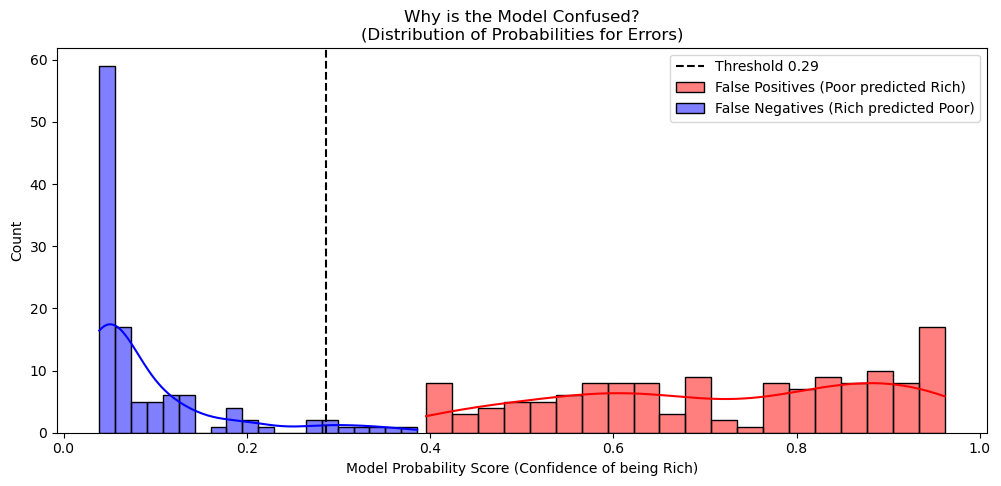


--- ERROR ANALYSIS REPORT ---
Note: Showing available features: []

--- WORST FALSE POSITIVES (Model was sure they were Rich, but they are Poor) ---
      Probability
531      0.961592
414      0.961554
3276     0.961447
2102     0.961291
3587     0.961111

--- WORST FALSE NEGATIVES (Model was sure they were Poor, but they are Rich) ---
      Probability
970      0.039007
470      0.039009
4389     0.039043
1496     0.039078
4137     0.039104


In [415]:
import seaborn as sns
import matplotlib.pyplot as plt

print("--- STARTING ERROR ANALYSIS ---")

analysis_df = pd.DataFrame(X_test_v7)
analysis_df['Actual'] = y_test_v5
analysis_df['Predicted'] =  (y_probs_v3 >= best_t).astype(int)
analysis_df['Probability'] = y_probs_v3

# 2. FILTER FOR ERRORS
# False Positives: Model said Rich (1), Actual was Poor (0)
fp_df = analysis_df[(analysis_df['Predicted'] == 1) & (analysis_df['Actual'] == 0)]

# False Negatives: Model said Poor (0), Actual was Rich (1)
fn_df = analysis_df[(analysis_df['Predicted'] == 0) & (analysis_df['Actual'] == 1)]

print(f"Total False Positives (Model Cried Wolf): {len(fp_df)}")
print(f"Total False Negatives (Missed Opportunities): {len(fn_df)}")

# 3. VISUALIZE THE CONFUSION
plt.figure(figsize=(12, 5))

# Plot False Positives
sns.histplot(fp_df['Probability'], color='red', label='False Positives (Poor predicted Rich)', kde=True, bins=20)
# Plot False Negatives
sns.histplot(fn_df['Probability'], color='blue', label='False Negatives (Rich predicted Poor)', kde=True, bins=20)

plt.axvline(best_threshold_stack, color='black', linestyle='--', label=f'Threshold {best_threshold_stack:.2f}')
plt.title("Why is the Model Confused?\n(Distribution of Probabilities for Errors)")
plt.xlabel("Model Probability Score (Confidence of being Rich)")
plt.legend()
plt.show()

preferred_cols = ['age', 'education-num', 'capital-gain', 'hours-per-week']

available_cols = [col for col in preferred_cols if col in analysis_df.columns]
display_cols = available_cols + ['Probability']

print(f"\n--- ERROR ANALYSIS REPORT ---")
print(f"Note: Showing available features: {available_cols}")

if len(fp_df) > 0:
    print("\n--- WORST FALSE POSITIVES (Model was sure they were Rich, but they are Poor) ---")
    print(fp_df.sort_values(by='Probability', ascending=False).head(5)[display_cols])

if len(fn_df) > 0:
    print("\n--- WORST FALSE NEGATIVES (Model was sure they were Poor, but they are Rich) ---")
    print(fn_df.sort_values(by='Probability', ascending=True).head(5)[display_cols])